# 2.0 Modélisation

In [ ]:
from google.colab import files
# téléchargez le fichier depuis mon PC vers Google Colab:
upload = files.upload()


Saving nba_data_processed.csv to nba_data_processed (1).csv


## Import des modules et sous modules

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score,
                            recall_score, f1_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                             AdaBoostClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Chargement des données prétraitées
df = pd.read_csv("nba_data_processed.csv")
X = df.drop(columns=["Shot Made Flag"])
y = df["Shot Made Flag"]

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition des modèles avec paramètres de base
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Entraînement et évaluation
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    metrics = {
        "Modèle": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "Train Score": model.score(X_train, y_train),
        "Matrice Confusion": confusion_matrix(y_test, y_pred)
    }
    results.append(metrics)

# Affichage comparatif
results_df = pd.DataFrame(results).sort_values("F1", ascending=False)
print("Classement des modèles par score F1 :")
print(results_df[["Modèle", "F1", "Accuracy", "Train Score"]].to_string(index=False))

# Export des résultats
results_df.to_csv("comparaison_modeles.csv", index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 361, number of negative: 513
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 874, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.413043 -> initscore=-0.351398
[LightGBM] [Info] Start training from score -0.351398
Classement des modèles par score F1 :
             Modèle       F1  Accuracy  Train Score
     Neural Network 0.626959  0.456621     0.413043
           AdaBoost 0.556213  0.657534     0.675057
        Naive Bayes 0.523560  0.584475     0.609840
  Gradient Boosting 0.515337  0.639269     0.853547
            XGBoost 0.502924  0.611872     1.000000
      Random Forest

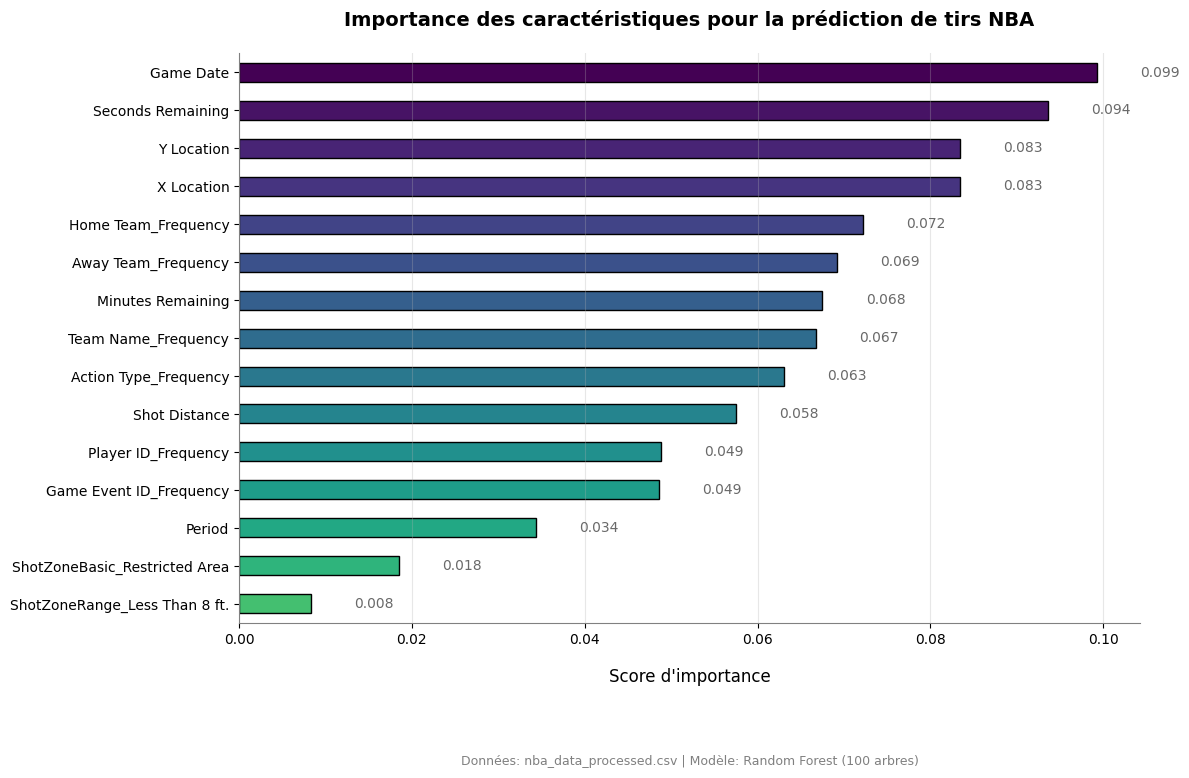

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Création du graphique
plt.figure(figsize=(12, 8))
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp = feature_imp.sort_values(ascending=True)[-15:]  # Top 15 features

# Palette de couleurs améliorée
colors = plt.cm.viridis_r(np.linspace(0.3, 1, len(feature_imp)))

ax = feature_imp.plot(kind='barh', color=colors, edgecolor='black')

# Ajout des valeurs et labels
for i in ax.patches:
    ax.text(i.get_width() + 0.005,
            i.get_y() + 0.15,
            f'{i.get_width():.3f}',
            fontsize=10,
            color='dimgrey')

# Personnalisation du style
plt.title('Importance des caractéristiques pour la prédiction de tirs NBA',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Score d\'importance', labelpad=15, fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.grid(axis='x', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#808080')
ax.spines['bottom'].set_color('#808080')

# Annotation contextuelle
plt.text(0.5, -0.25,
         'Données: nba_data_processed.csv | Modèle: Random Forest (100 arbres)',
         transform=ax.transAxes,
         ha='center',
         fontsize=9,
         color='gray')

plt.tight_layout()
plt.savefig('feature_importance_nba.png', dpi=300, bbox_inches='tight')
plt.show()